In [1]:
# reload modules before executing cells
%load_ext autoreload
%autoreload 2

In [2]:

from tqdm.notebook import tqdm
import torch
from diffusers import StableDiffusionPipeline, DDIMScheduler
from diffusers import DiffusionPipeline, UNet2DConditionModel
from transformers import CLIPTextModel

import os
import numpy as np
from PIL import Image

In [3]:
LOW_RESOURCE = False 
NUM_DIFFUSION_STEPS = 50
GUIDANCE_SCALE = 7.5
MAX_NUM_WORDS = 77
device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')
model_id = "./logs/dog/prior_high_lr_again"
ldm_stable = StableDiffusionPipeline.from_pretrained(model_id).to(device)
tokenizer = ldm_stable.tokenizer

In [4]:
from ptp_utils import show_cross_attention
from prompt2prompt import AttentionControl, AttentionStore, AttentionReplace
from diffusion_pipeline import run_and_display

/opt/conda/envs/dreambooth/lib/python3.11/site-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


  0%|          | 0/50 [00:00<?, ?it/s]

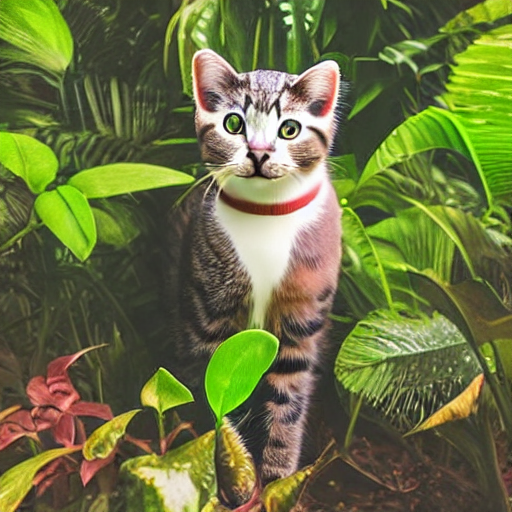

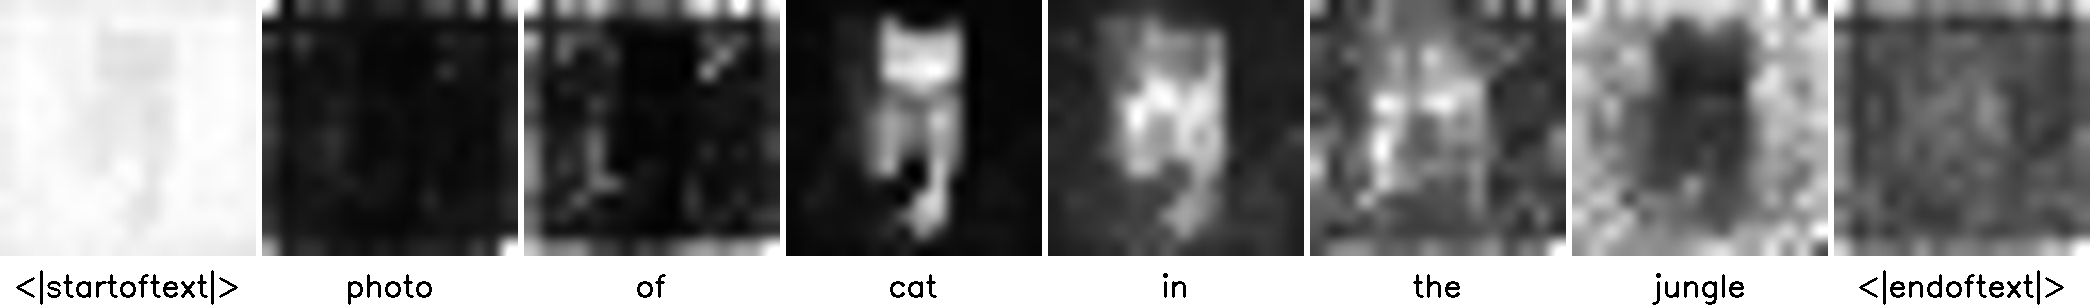

In [78]:
g_cpu = torch.Generator().manual_seed(1000)
prompts = ["photo of cat in the jungle"]
controller = AttentionStore()
image, x_t = run_and_display(ldm_stable, prompts, controller, latent=None, run_baseline=False, generator=g_cpu)
show_cross_attention(tokenizer, prompts, controller, res=16, from_where=("up", "down"))

w.o. prompt-to-prompt


  0%|          | 0/50 [00:00<?, ?it/s]

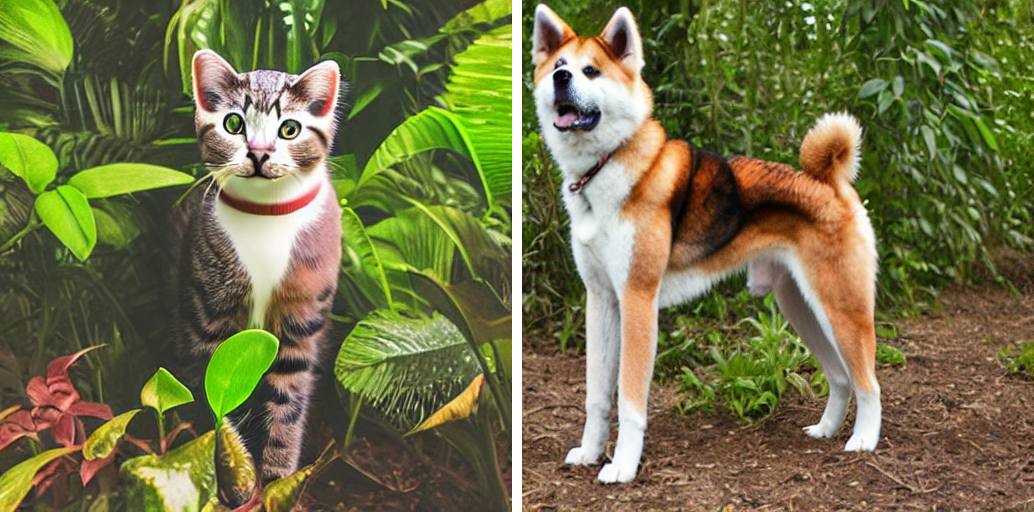

with prompt-to-prompt


  0%|          | 0/50 [00:00<?, ?it/s]

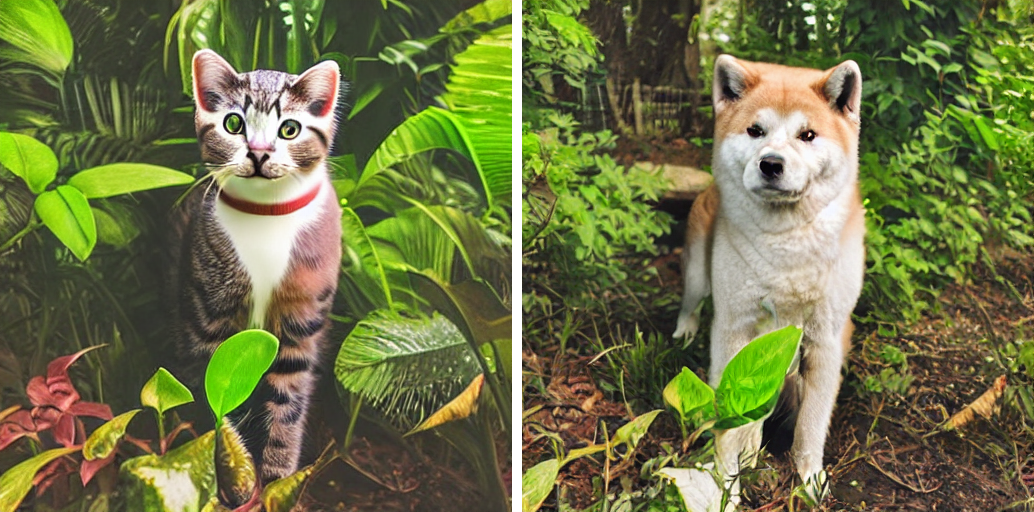

In [79]:
prompts = ["photo of cat in the jungle",
           "photo of <sks-dog> in the jungle"]

controller = AttentionReplace(tokenizer, device, prompts, NUM_DIFFUSION_STEPS, cross_replace_steps=1.0, self_replace_steps=0.3)
_ = run_and_display(ldm_stable, prompts, controller, latent=x_t, run_baseline=True)


/workspace/work/dreambooth/ptp_utils.py:126: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = latent.expand(batch_size,  model.unet.in_channels, height // 8, width // 8).to(model.device)


  0%|          | 0/50 [00:00<?, ?it/s]

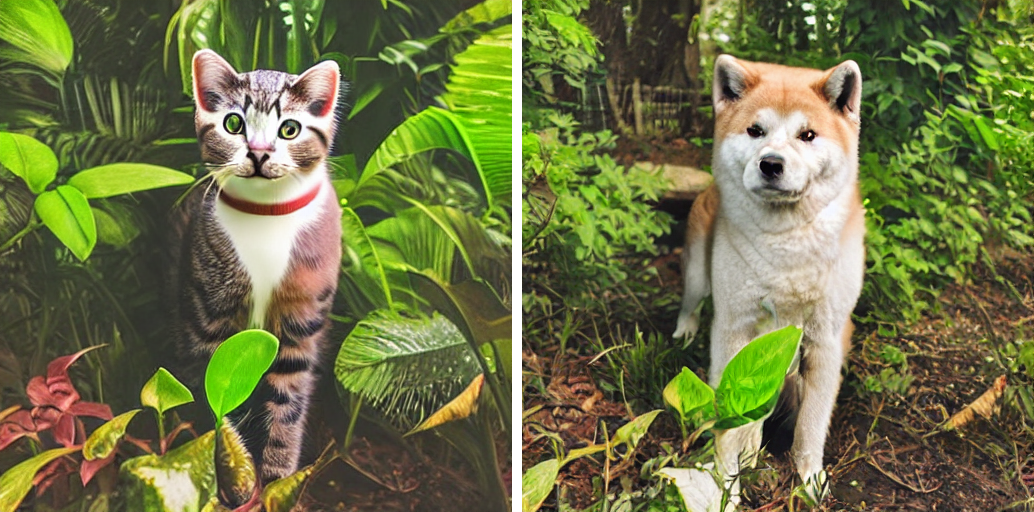

In [58]:
prompts = ["photo of cat in the jungle",
           "photo of <sks-dog> in the jungle"]

controller = AttentionReplace(tokenizer, device, prompts, NUM_DIFFUSION_STEPS, cross_replace_steps=2.0, self_replace_steps=0.3)
_ = run_and_display(ldm_stable, prompts, controller, latent=x_t, run_baseline=False)


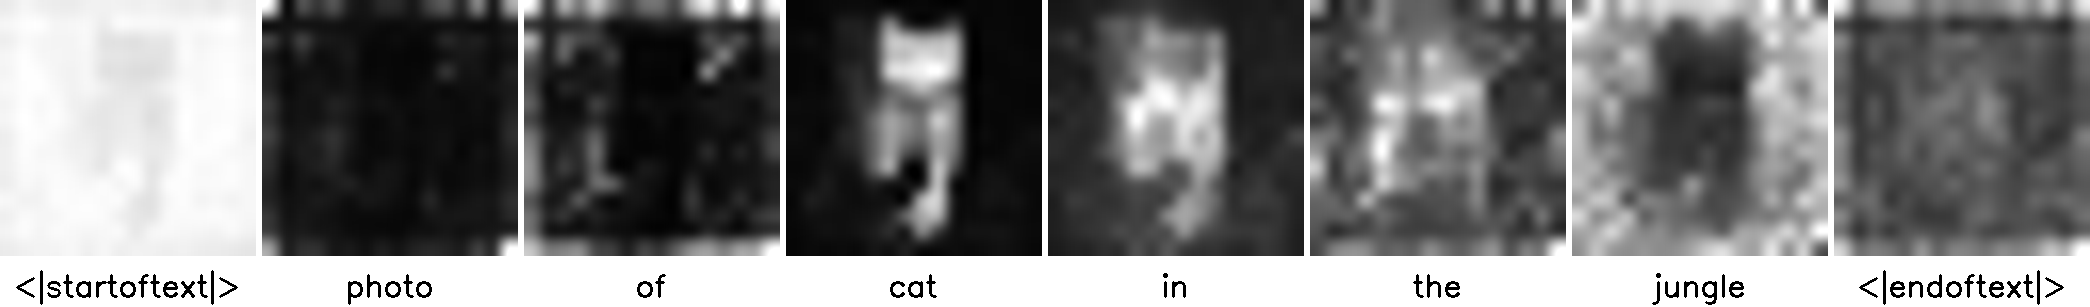

In [56]:
show_cross_attention(tokenizer, prompts, controller, res=16, from_where=("up", "down"))

/workspace/work/dreambooth/ptp_utils.py:126: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  latents = latent.expand(batch_size,  model.unet.in_channels, height // 8, width // 8).to(model.device)


  0%|          | 0/50 [00:00<?, ?it/s]

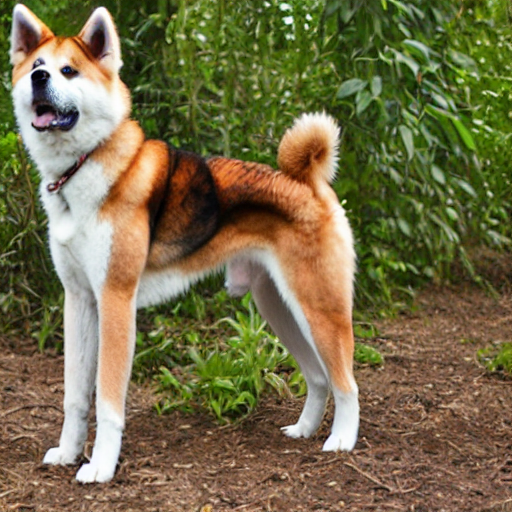

In [80]:
prompts = ["photo of <sks-dog> in the jungle"]

controller = AttentionStore()
image, x_t = run_and_display(ldm_stable, prompts, controller, latent=x_t, run_baseline=False, generator=g_cpu)

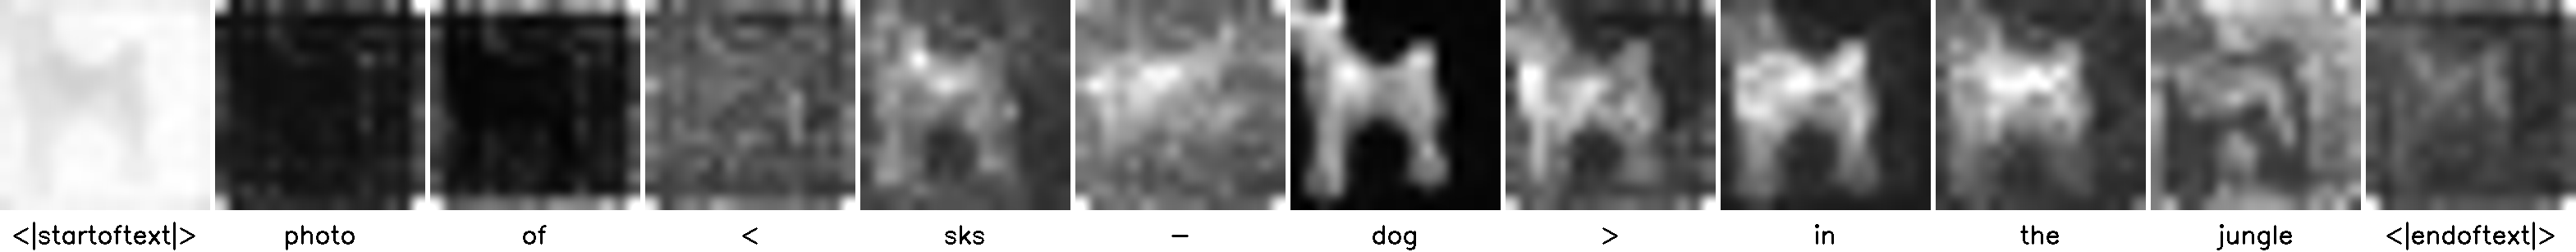

In [81]:
show_cross_attention(tokenizer, prompts, controller, res=16, from_where=("up", "down"))